Dimensionality Reduction is part of unsupervised learning .
Its used to find the most important component (inputs) to be used in prediction.
- Most common is PCA( principal component analysis)

# PCA

In [1]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df['target'] = cancer.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

for PCA 
- standardize the dataset
- create a PCA object
- then fit transform

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.iloc[:,:-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### You have to select the number of columns to reduce to
`n_components = 2`
- this will make the input columns in 2 cols -> still containing the same information as before

In [17]:
from sklearn.decomposition import PCA

In [39]:
pca_features = PCA(n_components=2)
important_cols = pca_features.fit_transform(X) 

In [40]:
important_cols

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [41]:
imp_col_df = pd.DataFrame(important_cols, columns=['component_1','component_2'])
imp_col_df.head()
imp_col_df['target'] = cancer.target

In [37]:
imp_col_df

,component_1,component_2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


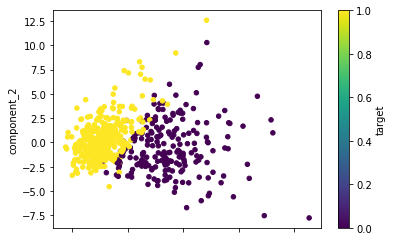

In [38]:
imp_col_df.plot.scatter(x ='component_1',y='component_2',c='target',cmap='viridis',)
plt.show()